In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [3]:
X_train_full.shape # 60000 28x28 pictures

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

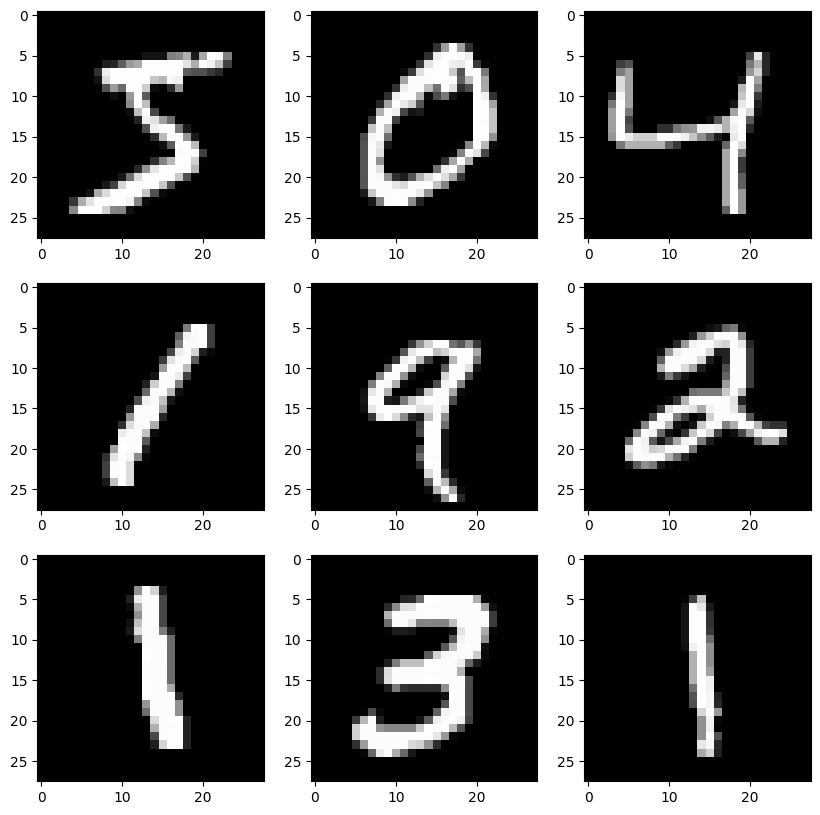

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a=0

for i in range(3):
    for j in range(3):
        axes[i,j].imshow(X_train_full[a], cmap=plt.get_cmap('gray'))
        a = a+1
        
plt.show()

In [7]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [8]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
y_valid[2]

4

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [12]:
class_names[y_train[0]]

'7'

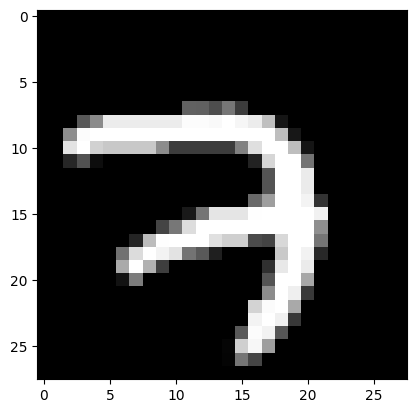

In [13]:
plt.imshow(X_train[0], cmap=plt.get_cmap("gray"))

## Creating Neural Network

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) #10 neuron cuz 10 possible outcome (0-9)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid, y_valid), batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6026 - accuracy: 0.8459 - val_loss: 0.3164 - val_accuracy: 0.9146
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2950 - accuracy: 0.9159 - val_loss: 0.2443 - val_accuracy: 0.9348
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2415 - accuracy: 0.9309 - val_loss: 0.2066 - val_accuracy: 0.9446
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2066 - accuracy: 0.9407 - val_loss: 0.1827 - val_accuracy: 0.9484
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1800 - accuracy: 0.9484 - val_loss: 0.1616 - val_accuracy: 0.9564
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1596 - accuracy: 0.9551 - val_loss: 0.1504 - val_accuracy: 0.9574
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1433 - accuracy: 0.9589 - val_loss: 0.1351 - val_accuracy

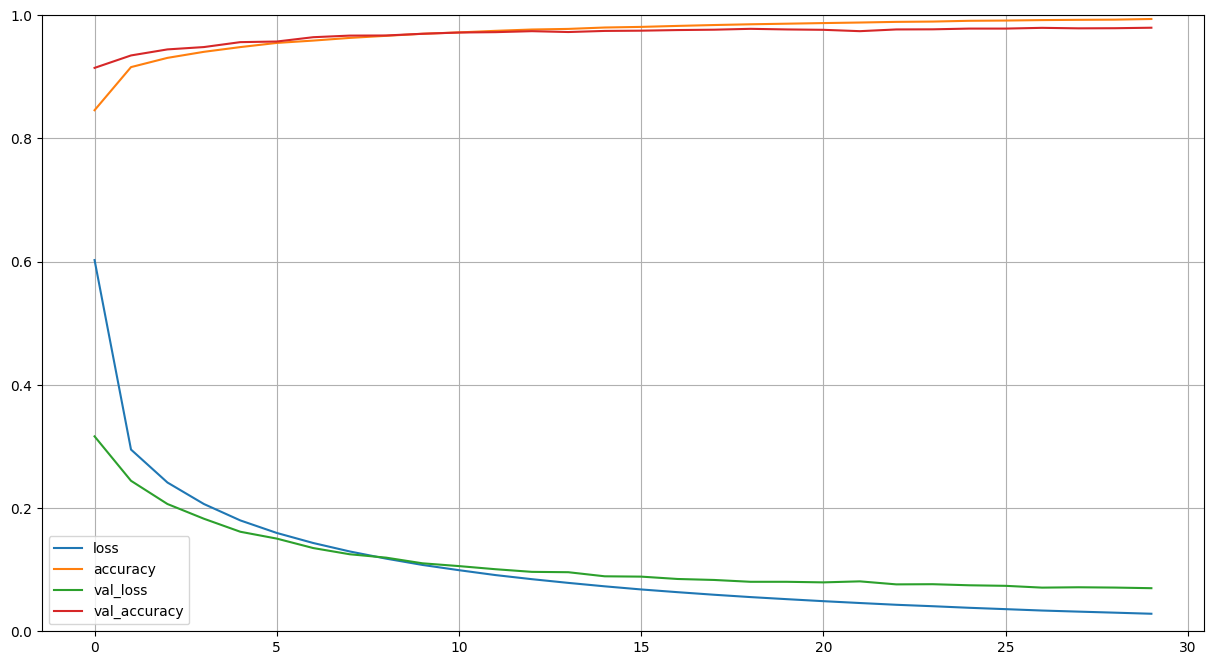

In [20]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
model.evaluate(X_test,y_test) ## [loss, accuracy]

313/313 [==============================] - 1s 3ms/step - loss: 0.0752 - accuracy: 0.9764


[0.07522035390138626, 0.9764000177383423]

In [22]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis = -1)
y_classes

313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [23]:
model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


array([[2.4593552e-07, 1.9887428e-07, 5.1911356e-05, ..., 9.9910730e-01,
        2.3899922e-05, 9.5730647e-06],
       [3.8810771e-07, 5.9801449e-05, 9.9967003e-01, ..., 1.1536943e-11,
        5.3563181e-06, 1.6610940e-12],
       [8.3155701e-06, 9.9653375e-01, 5.9028814e-04, ..., 1.2537577e-03,
        8.9332880e-04, 1.7793491e-05],
       ...,
       [5.1329441e-11, 3.7316247e-10, 2.2559102e-10, ..., 2.3078512e-06,
        1.6312433e-06, 2.0802259e-05],
       [1.0606841e-06, 6.9881551e-08, 1.7151319e-09, ..., 2.0271271e-09,
        3.0391040e-04, 1.4020758e-09],
       [1.3422414e-07, 6.8060238e-13, 2.0351473e-07, ..., 7.6921537e-13,
        3.1327292e-09, 2.7381379e-09]], dtype=float32)

In [24]:
confusion_matrix=tf.math.confusion_matrix(y_test, y_classes)

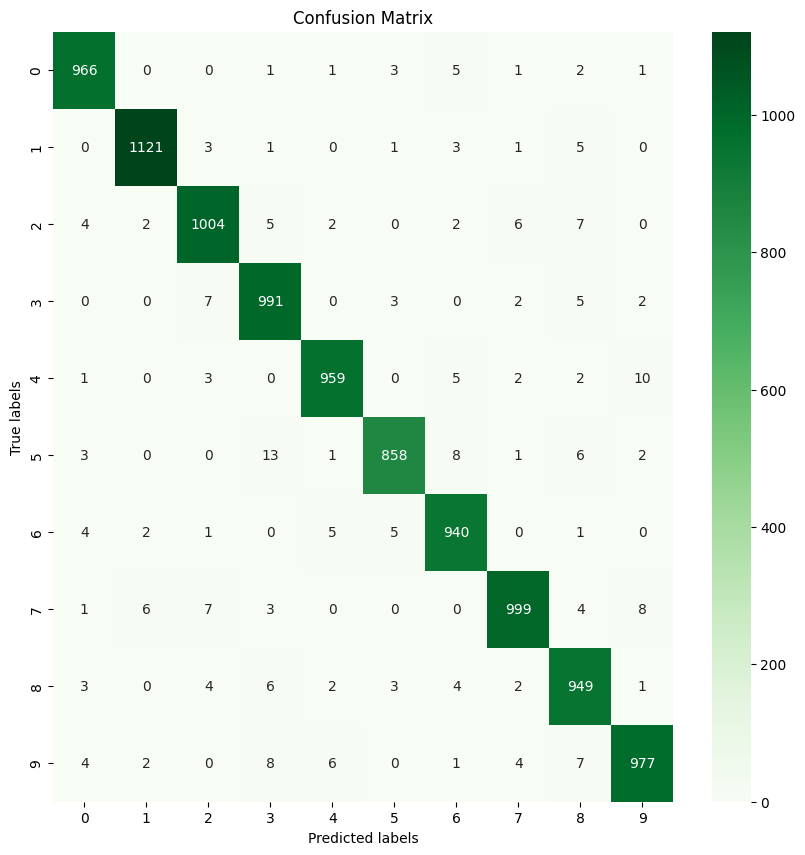

In [25]:
import seaborn as sns

fig = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')

fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10,10)

plt.show()